In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


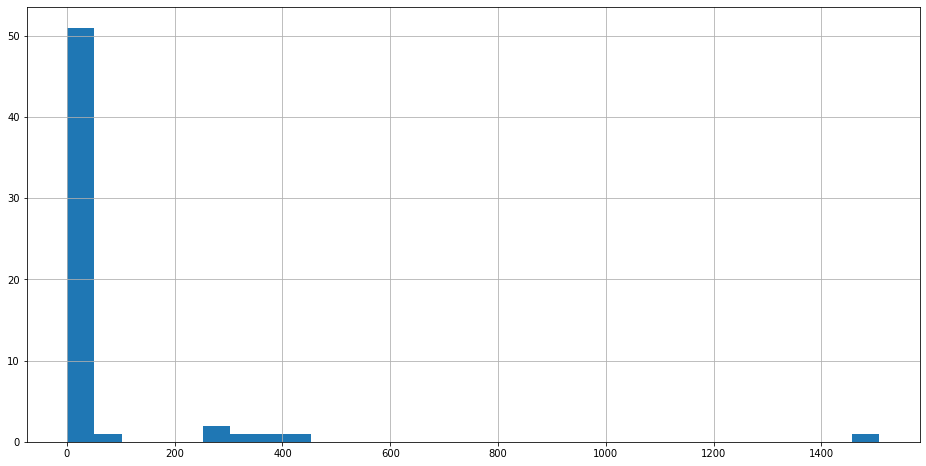

In [4]:
# oX - количество поставленных тегов
# oY - количество пользователей, поставивших столько тегов

plt.figure(figsize=(16, 8))
tags.groupby('userId').tag.count().hist(bins=30)

In [5]:
# медианное количество тегов на пользователя
tags.groupby('userId').tag.count().median()

4.0

In [6]:
# среднее количество тегов на пользователя
tags.groupby('userId').tag.count().mean()

63.5

In [7]:
tags.shape

(3683, 4)

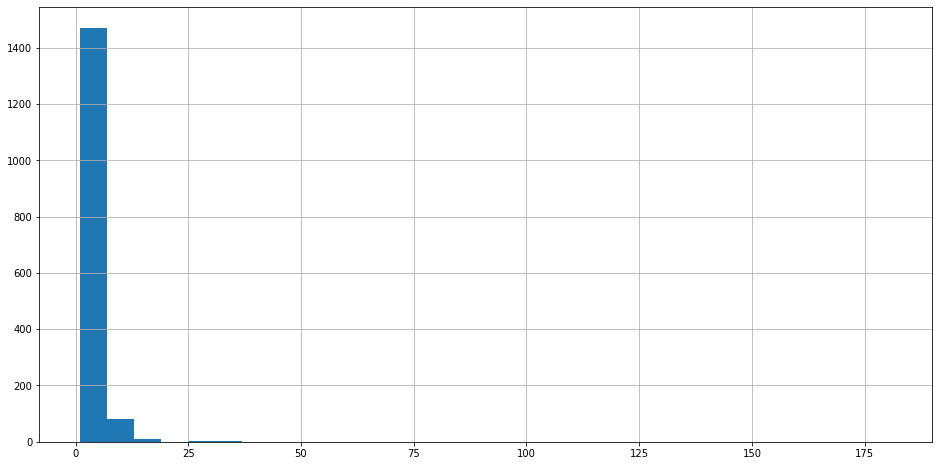

In [8]:
# oX - количество поставленных тегов
# oY - количество фильмов с таким числом тегов

plt.figure(figsize=(16, 8))
tags.groupby('movieId').tag.count().hist(bins=30)

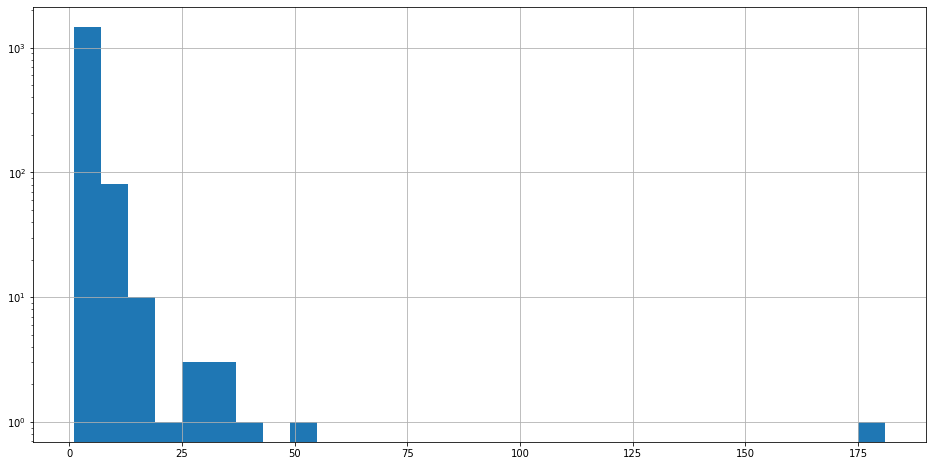

In [9]:
# oX - количество поставленных тегов
# oY - log(количество фильмов с таким числом тегов)

plt.figure(figsize=(16, 8))
tags.groupby('movieId').tag.count().hist(bins=30, log=True)

In [10]:
# среднее число тегов на фильм
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [11]:
# Медианное число тегов на фильм
tags.groupby('movieId').tag.count().median()

1.0

In [12]:
year_month = []

for t in tqdm_notebook(tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))

<ipython-input-12-322818ccabeb>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm_notebook(tags.timestamp.values):


In [13]:
tags['year_month'] = np.array(year_month)

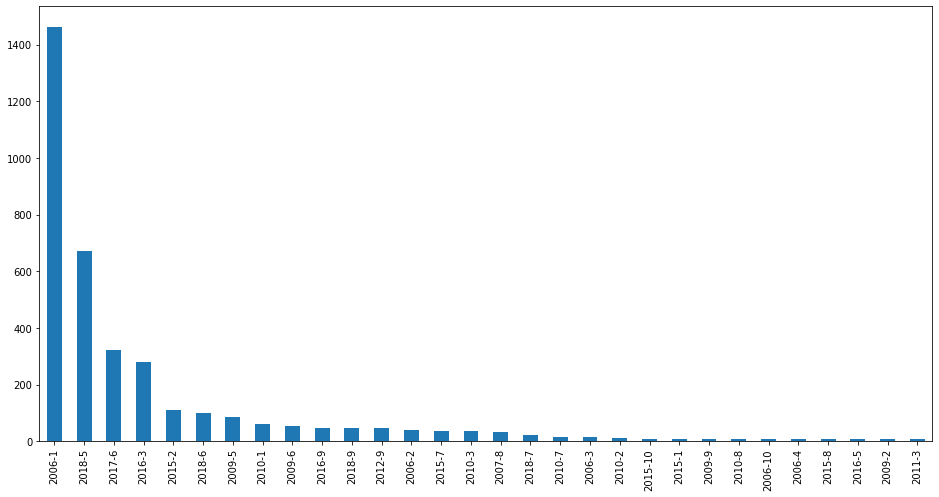

In [14]:
# oX - дата проставления тега (топ-30 дат по числу тегов)
# oY - количество тегов, проставленных в эту дату

plt.figure(figsize=(16, 8))
tags.year_month.value_counts()[:30].plot.bar()

In [15]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]

(array([2.851e+03, 3.218e+03, 2.338e+03, 9.870e+02, 2.710e+02, 6.300e+01,
        1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

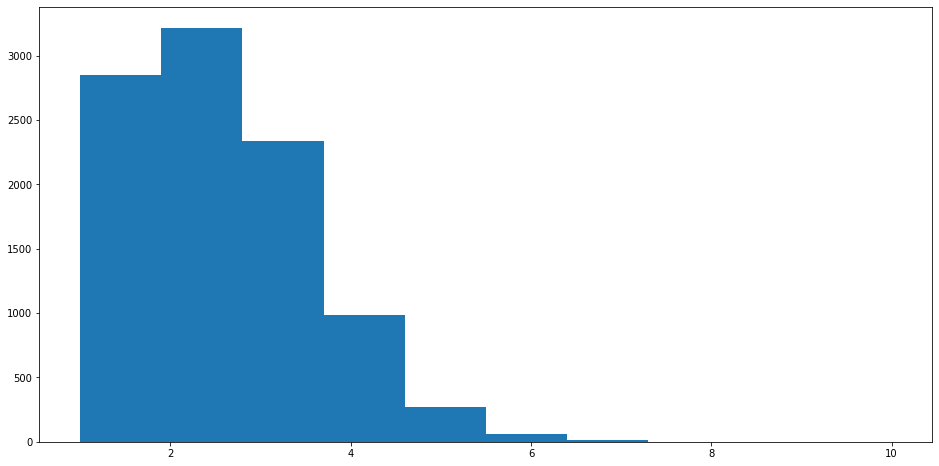

In [16]:
# oX - количество жанров
# oY - количество фильмов с таким числом жанров

plt.figure(figsize=(16, 8))
plt.hist(num_genres_on_movie)

In [17]:
# среднее количество жанров на фильм
np.mean(num_genres_on_movie)

2.2668856497639087

In [18]:
# медианное количество жанров на фильм
np.median(num_genres_on_movie)

2.0

In [19]:
# фильм с наибольшим количеством жанров
movies['num_genres'] = movies.genres.apply(lambda x: len(x.split('|')))
movies.iloc[movies['num_genres'].idxmax()]

movieId                                                   81132
title                                             Rubber (2010)
genres        Action|Adventure|Comedy|Crime|Drama|Film-Noir|...
num_genres                                                   10
Name: 7441, dtype: object